In [2]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

Many of the variables that data scientists study are *quantitative* or *numerical*. Their values are numbers on which you can perform arithmetic. Examples that we have seen include the number of periods in chapters of a book, the amount of money made by movies, and the age of people in the United States.

The values of a categorical variable can be given numerical codes, but that doesn't make the variable quantitative. In the example in which we studied Census data broken down by age group, the categorial variable `SEX` had the numerical codes `1` for 'Male,' `2` for 'Female,' and `0` for the aggregate of both groups `1` and `2`. While 0, 1, and 2 are numbers, in this context it doesn't make sense to subtract 1 from 2, or take the average of 0, 1, and 2, or perform other arithmetic on the three values. `SEX` is a categorical variable even though the values have been given a numerical code.

For our main example, we will return to a dataset that we studied when we were visualizing categorical data. It is the table `top`, which consists of data from U.S.A.'s top grossing movies of all time. For convenience, here is the description of the table again.

The first column contains the title of the movie. The second column contains the name of the studio that produced the movie. The third contains the domestic box office gross in dollars, and the fourth contains the  gross amount that would have been earned from ticket sales at 2016 prices. The fifth contains the release year of the movie. 

There are 200 movies on the list. Here are the top ten according to the unadjusted gross receipts in the column `Gross`.

In [3]:
top = Table.read_table('top_movies.csv')
# Make the numbers in the Gross and Gross (Adjusted) columns look nicer:
top.set_format([2, 3], NumberFormatter)
top

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),"906,723,418","906,723,400",2015
Avatar,Fox,"760,507,625","846,120,800",2009
Titanic,Paramount,"658,672,302","1,178,627,900",1997
Jurassic World,Universal,"652,270,625","687,728,000",2015
Marvel's The Avengers,Buena Vista (Disney),"623,357,910","668,866,600",2012
The Dark Knight,Warner Bros.,"534,858,444","647,761,600",2008
Star Wars: Episode I - The Phantom Menace,Fox,"474,544,677","785,715,000",1999
Star Wars,Fox,"460,998,007","1,549,640,500",1977
Avengers: Age of Ultron,Buena Vista (Disney),"459,005,868","465,684,200",2015
The Dark Knight Rises,Warner Bros.,"448,139,099","500,961,700",2012


### Visualizing the distribution of the adjusted receipts ###

In this section we will draw graphs of the distribution of the numerical variable in the column `Gross (Adjusted)`. Since three-digit numbers are easier to work with than nine-digit numbers, let's measure the `Adjusted Gross` receipts in millions of dollars. Note how `round` is used to retain only two decimal places.

In [5]:
millions = top.with_column('Adjusted Gross', 
                           np.round(top.column("Gross (Adjusted)")/1e6, 2))
millions

Title,Studio,Gross,Gross (Adjusted),Year,Adjusted Gross
Star Wars: The Force Awakens,Buena Vista (Disney),"906,723,418","906,723,400",2015,906.72
Avatar,Fox,"760,507,625","846,120,800",2009,846.12
Titanic,Paramount,"658,672,302","1,178,627,900",1997,1178.63
Jurassic World,Universal,"652,270,625","687,728,000",2015,687.73
Marvel's The Avengers,Buena Vista (Disney),"623,357,910","668,866,600",2012,668.87
The Dark Knight,Warner Bros.,"534,858,444","647,761,600",2008,647.76
Star Wars: Episode I - The Phantom Menace,Fox,"474,544,677","785,715,000",1999,785.72
Star Wars,Fox,"460,998,007","1,549,640,500",1977,1549.64
Avengers: Age of Ultron,Buena Vista (Disney),"459,005,868","465,684,200",2015,465.68
The Dark Knight Rises,Warner Bros.,"448,139,099","500,961,700",2012,500.96


#### A bar chart: The wrong visualization
We could use a bar chart to display the distribution of adjusted gross receipts, but it doesn't work very well.

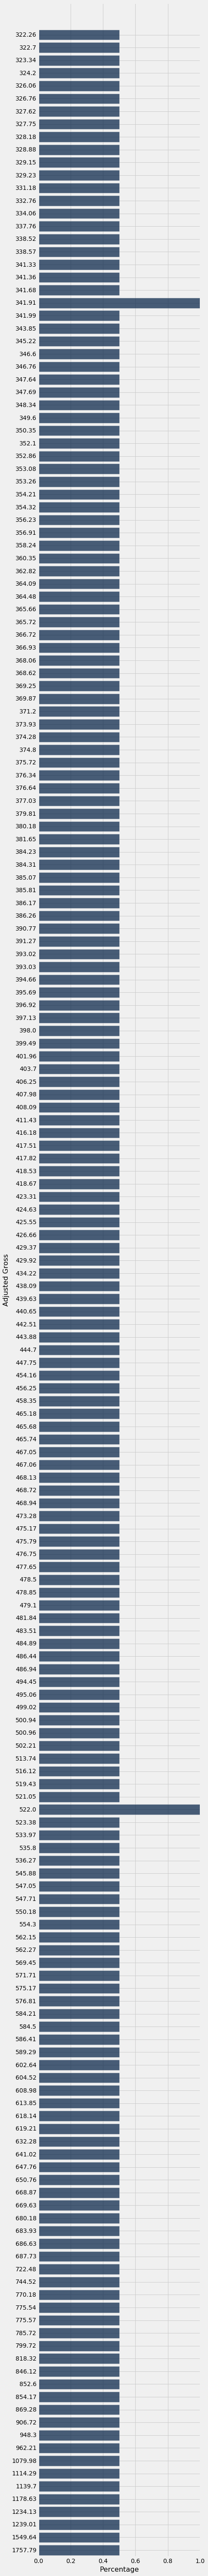

In [27]:
by_gross = millions.group('Adjusted Gross')
gross_percents = 100 * by_gross.column('count') / sum(by_gross.column('count'))
with_percents = by_gross.with_column("Percentage", gross_percents)
with_percents.barh('Adjusted Gross', 'Percentage')

There are two problems:

1. Two movies made \$341.91 million, two movies made \$522.0 million, and all other movies made unique amounts of money.  So the bars don't really summarize anything for us.
2. The bars aren't spaced in a way that shows differences in amounts.  The last bar, for Gone with the Wind, is right next to the second-to-last bar, even though they are \$200 million apart.  The first and second bars are also right next to each other, and the difference between the dollar amounts is only \$440,000.

### A histogram ###
A *histogram* of a numerical dataset looks very much like a bar chart, though it has some important differences that we will examine in this section. First, let's just draw a histogram of the adjusted receipts.

The `hist` method generates a histogram of the values in a column. The optional `unit` argument is used to help label the two axes. The histogram shows the distribution of the adjusted gross amounts, in millions of 2016 dollars.  Specifically, it shows the *frequency* distribution - percentages of movies rather than counts of movies.

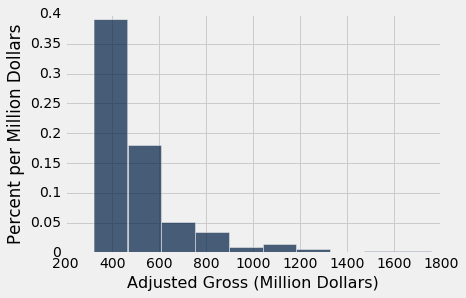

In [13]:
millions.hist('Adjusted Gross', unit="Million Dollars")

### The horizontal axis ###

To solve the first problem with the bar chart, a histogram groups the numbers into contiguous intervals called *bins*. To solve the second problem, we lay the bars across the bins they cover, so that bars that are further apart represent numbers that are more dissimilar.

For example, the leftmost bin corresponds to the leftmost bar and goes from roughly \$325 million to roughly \$450 million.  For this histogram, it is a little hard to see exactly where the ends of the bins are situated.

We can see that there are 10 bins (some bars are so low that they are hard to see), and that they all have the same width. We can also see that none of the movies grossed fewer than 300 million dollars; that is because we are considering only the top grossing movies of all time. 

#### Details about binning
Although in this dataset no movie grossed an amount that is exactly on the edge between two bins, `hist` does have to account for situations where there might have been values at the edges. So `hist` has an *endpoint convention*: bins include the data at their left endpoint, but not the data at their right endpoint. 

We will use the notation [*a*, *b*) for the bin that starts at *a* and ends at *b* but doesn't include *b*.

Sometimes, adjustments have to be made in the first or last bin, to ensure that the smallest and largest values of the variable are included. You saw an example of such an adjustment in the Census data studied earlier, where an age of "100" years actually meant "100 years old or older."

The optional named argument `bins` can be used with `hist` to specify the endpoints of the bins. It must consist of an array of numbers that starts with the left end of the first bin and ends with the right end of the last bin. We will start by setting the numbers in `bins` to be 300, 350, 400, and so on, ending with 2000.  

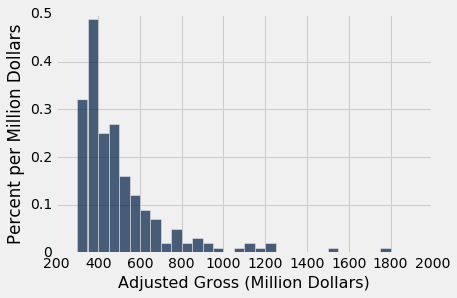

In [23]:
bin_width = 50
millions.hist('Adjusted Gross', bins=np.arange(300,2000+bin_width,bin_width), unit="Million Dollars")

The horizontal axis of this figure is easier to read. The labels 200, 400, 600, and so on are centered at the corresponding values. The tallest bar is for movies that grossed between \$350 million and \$400 million. 

A very small number of movies grossed 800 million dollars or more. This results in the figure being "skewed to the right," or, less formally, having "a long right hand tail." Distributions of variables like income or rent in large populations also often have this kind of shape.

### The counts in the bins ###
The counts of values in the bins can be computed from a table using the `bin` method, which takes a column label and an optional sequence or number of bins. The result is a tabular form of a histogram. The first column lists the left endpoints of the bins (but see the note about the final value, below). The second column contains the counts of all values in the `Adjusted Gross` column that are in the corresponding bin. That is, it counts all the `Adjusted Gross` values that are greater than or equal to the value in `bin`, but less than the next value in `bin`.

In [24]:
bin_counts = millions.bin('Adjusted Gross', bins=np.arange(300,2000+bin_width,bin_width))
bin_counts.show()

bin,Adjusted Gross count
300,32
350,49
400,25
450,27
500,16
550,12
600,9
650,7
700,2
750,5


**A detail about binning:** Notice the `bin` value 2000 in the last row. That's not the left end-point of any bar – it's the right end point of the last bar. By the endpoint convention, the data there are not included. So the corresponding `count` is recorded as 0, and would have been recorded as 0 even if there had been movies that made more than \$2,000$ million dollars. When either `bin` or `hist` is called with a `bins` argument, the graph only considers values that are in the specified bins.

Once values have been binned, the resulting counts can be used to generate a histogram using the `bin_column` named argument to specify which column contains the bin lower bounds.

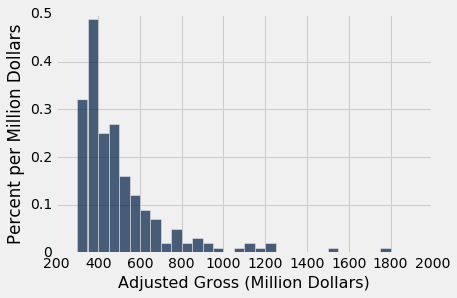

In [25]:
bin_counts.hist('Adjusted Gross count', bin_column='bin', unit='Million Dollars')

### The vertical axis: density scale ###

The horizontal axis of a histogram is straightforward to read, once we have taken care of details like the ends of the bins. The features of the vertical axis require a little more attention. We will go over them one by one.

Let's start by examining how to calculate the numbers on the vertical axis. If the calculation seems a little strange, have patience – the rest of the section will explain the reasoning.

**Calculation.** The height of each bar is the percent of elements that fall into the corresponding bin, relative to the width of the bin.

In [26]:
counts = bin_counts.relabeled('Adjusted Gross count', 'Count')
total_count = sum(counts.column('Count')) # This is 200
proportions = counts.with_column(
    'Proportion', (counts.column('Count')/total_count)
    )
percents = proportions.with_column(
    'Percent', proportions.column('Proportion')*100
    )
heights = percents.with_column(
    'Height', percents.column('Percent')/bin_width # bin_width is 50
    )
heights

bin,Count,Proportion,Percent,Height
300,32,0.16,16,0.32
350,49,0.245,24.5,0.49
400,25,0.125,12.5,0.25
450,27,0.135,13.5,0.27
500,16,0.08,8,0.16
550,12,0.06,6,0.12
600,9,0.045,4.5,0.09
650,7,0.035,3.5,0.07
700,2,0.01,1,0.02
750,5,0.025,2.5,0.05


Go over the numbers on the vertical axis of the histogram above to check that the column `Heights` looks correct.

The calculations will become clear if we just examine the first row of the table. 

Remember that there are 200 movies in the dataset. The [300, 350) bin contains 32 movies. That's 16% of all the movies:
$$
\mbox{Percent} = \frac{32}{200} \cdot 100 = 16
$$

The width of the [300, 350) bin is $ 350 - 300 = 50$. So
$$
\mbox{Height} = \frac{16}{50} = 0.32
$$

The code for calculating the heights used the facts that there are 200 movies in all and that the width of each bin is 50.

**Units.** The height of the bar is 40.5% divided by 100 million dollars, and so the height is 0.405% per million dollars. 

### The area principle
The intricate calculation of heights comes down to one requirement: The area of each bar should represent the amount of stuff in the corresponding bin in the distribution we're trying to show.  We saw in the previous section why this is an important requirement.  Since we're displaying the frequency distribution of gross receipts, the area of a bar should represent the percentage of movies in the corresponding bin.

In a bar chart, we were lax about the distinction between lengths and areas because the horizontal axis had no real meaning.  The categories were arranged however we wanted to arrange them, so we could always think of the width of a bar as 1.

In a histogram, the horizontal axis is a number line, so the width of a bar is an actual number.  This means we have to take the distinction between length and area seriously.  Their relationship is:

![Histogram bar area formula](/images/histogram_area.png)

$$\text{Area of bar} = \text{Width of bar} \times \text{Length of bar}$$
$$\text{Length of bar} = \frac{\text{Area of bar} } {\text{Width of bar} }$$

The area principle tells us we should ensure that:

$$\text{Area of bar} = \text{Percentage in corresponding bin}$$

Putting these together, we have:

$$\text{Length of bar} = \frac{\text{Area of bar} } {\text{Width of bar} } = \frac{\text{Percentage in corresponding bin} } {\text{Width of bar} }$$

Since the top is a percentage, and the bottom is in the horizontal axis units (the units of the numbers whose distribution we're plotting), the units of length are $\frac{\text{Percentage } } {\text{Horizontal axis unit} }$.  The vertical axis is said to be *on the density scale*. The height of bar is **not** the percent of entries in the bin; it is the percent of entries in the bin relative to the amount of space in the bin. That is why the height measures crowdedness or *density*.

### Histograms for count distributions
Just as a bar chart can display either a count or a frequency distribution, it is possible to create a histogram to display a count distribution.  In that case, we would still want to satisfy the area principle, so we would have:

$$\text{Area of bar} = \text{Count in corresponding bin},$$

and so:

$$\text{Length of bar} = \frac{\text{Area of bar} } {\text{Width of bar} } = \frac{\text{Count in corresponding bin} } {\text{Width of bar} }.$$

However, such histograms are not commonly used in any case, so we will not dwell on this further.  Unfortunately, there is currently no simple way using Python or the course `datascience` package to generate a proper histogram for a count distribution.

### Flat tops and the negative consequences of binning ###
Even though the density scale correctly represents percents using area, some detail is lost by grouping values into bins.

Take a look at the [300, 400) bin in the figure below. The flat top of the bar, at the level 0.405% per million dollars, hides the fact that the movies are somewhat unevenly distributed across that bin. 

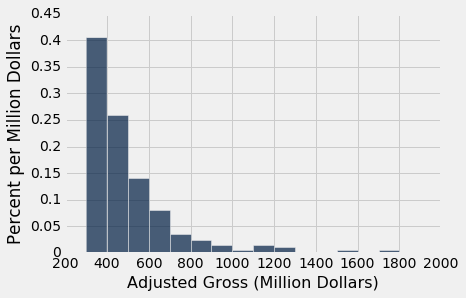

In [32]:
millions.hist('Adjusted Gross', bins=np.arange(300, 2000+100, 100), unit="Million Dollars")

To see this, let us split each bin into 10 narrower bins, each of width 10 million dollars.

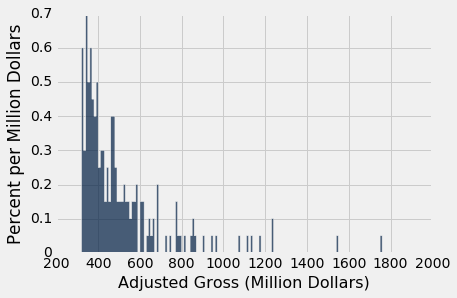

In [31]:
millions.hist('Adjusted Gross', bins=np.arange(300, 2000+10, 10), unit='Million Dollars')

Some of the skinny bars are taller than 0.405 and others are shorter; the first two have heights of 0 because there are no data between 300 and 320. By putting a flat top at the level 0.405 across the whole bin, we are deciding to ignore the finer detail and are using the flat level as a rough approximation. Often, though not always, this is sufficient for understanding the general shape of the distribution.

**The height as a rough approximation.**
This observation gives us a different way of thinking about the height.
Look again at the [300, 400) bin in the earlier histograms. As we have seen, the bin is 100 million dollars wide and contains 40.5% of the data. Therefore the height of the corresponding bar is 0.405% per million dollars.

Now think of the bin as consisting of 100 narrow bins that are each 1 million dollars wide. The bar's height of "0.405% per million dollars" means that as a rough approximation, 0.405% of the movies are in each of those 100 skinny bins of width 1 million dollars.

Notice that because we have the entire dataset that is being used to draw the histograms, we can draw the histograms to as fine a level of detail as the data and our patience will allow. However, if you are looking at a histogram in a book or on a website, and you don't have access to the underlying dataset, then it becomes important to have a clear understanding of the "rough approximation" created by the flat tops.

### Histograms Q&A ###
Let's draw the histogram again, this time with bins of width 50, and check our understanding of the concepts.

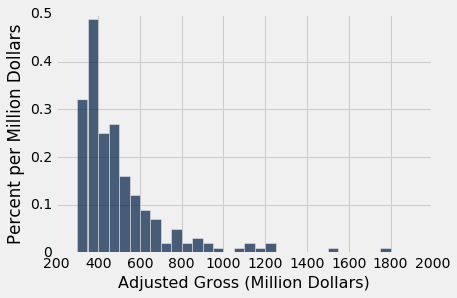

In [33]:
millions.hist('Adjusted Gross', bins=np.arange(300, 2000+50, 50), unit='Million Dollars')

In [34]:
millions.bin('Adjusted Gross', bins=np.arange(300, 2000+50, 50))

bin,Adjusted Gross count
300,32
350,49
400,25
450,27
500,16
550,12
600,9
650,7
700,2
750,5


**Q**: Did more movies make between \$400 and \$450 million, or between \$450 and \$500 million?

**A**: Slightly more movies (27 versus 25) made between \$450 and \$500 million.

**Q**: Did more movies make between \$450 and \$500 million, or between \$500 and \$600 million?

**A**: To find out the number of movies that made between \$500 and $\600 million, we have to add the [500, 550) and [550, 600) bins together.  That gets us 28 movies, so slightly more movies made between \$500 and \$600 million.

### Differences Between Bar Charts and Histograms ### 

- Bar charts display one quantity per category. They are often used to display the distributions of categorical variables. Histograms display the distributions of quantitative variables (numbers). This requires the numbers to be grouped into *bins*.
- In a bar chart, the horizontal axis serves only to organize the bars. To satisfy the area principle, each bar should be drawn with the same width. In a histogram, the horizontal axis is a number line, and bars cover specific, nonoverlapping, contiguous intervals. The area of a bar is therefore equal to its width times its length, which imparts a special meaning and units to the length.
- The lengths (possibly called "heights," if the bars are drawn vertically) of the bars in a bar chart are proportional to the value for each category, since the width of each bar can be understood to be 1. The lengths (again, possible called "heights") of bars in a histogram measure densities; the *areas* of bars in a histogram are proportional to the numbers of entries in the bins.